Initial Data Preview:
     Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3    

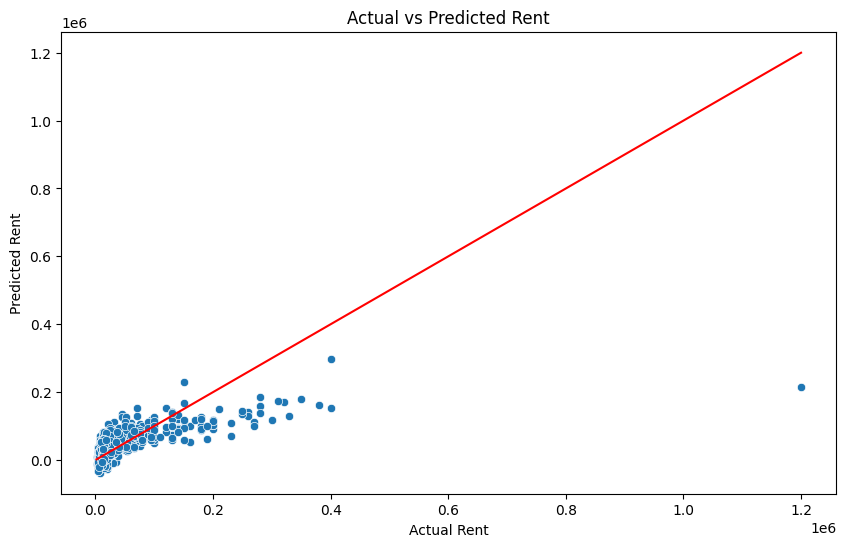

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
def load_data():
    # Load dataset from the given file path
    file_path = r'C:\Users\hariv\Downloads\House_Rent_Dataset.csv'
    try:
        data = pd.read_csv(file_path)
        return data
    except FileNotFoundError:
        print("Dataset not found. Please ensure the file is available.")
        return None

# Step 2: Data Preprocessing
def preprocess_data(data):
    # Drop irrelevant columns
    data = data.drop(columns=['Posted On', 'Area Locality', 'Point of Contact'])

    # Handle missing values
    data = data.dropna()

    # Encode categorical features
    categorical_columns = ['Floor', 'Area Type', 'City', 'Furnishing Status', 'Tenant Preferred']
    for column in categorical_columns:
        data[column] = data[column].astype('category').cat.codes

    return data

# Step 3: Splitting the data into features and target
def split_data(data):
    X = data.drop(columns=['Rent'])  # Target variable is 'Rent'
    y = data['Rent']
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the model
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Step 5: Evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared: {r2}")

    return y_pred

# Step 6: Visualize predictions vs actual values
def plot_results(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel("Actual Rent")
    plt.ylabel("Predicted Rent")
    plt.title("Actual vs Predicted Rent")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
    plt.show()

# Main function
def main():
    data = load_data()
    if data is not None:
        print("Initial Data Preview:\n", data.head())

        data = preprocess_data(data)
        print("Data after Preprocessing:\n", data.head())

        X_train, X_test, y_train, y_test = split_data(data)

        model = train_model(X_train, y_train)
        
        print("Model Training Complete.")

        y_pred = evaluate_model(model, X_test, y_test)

        plot_results(y_test, y_pred)

if __name__ == "__main__":
    main()


In [1]:
import pandas as pd
data = pd.read_csv('House_Rent_Dataset.csv')
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
